In [191]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer 
from bokeh.plotting import figure, output_file, show
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

%matplotlib inline

# Data Preparation

### Load Data

In [192]:
google = pd.read_csv("data/googleplaystore.csv")
google_review = pd.read_csv("data/googleplaystore_user_reviews.csv")

In [193]:
google.head(2) 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [194]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [195]:
shape = google.shape

print("Rows: {}".format(shape[0]))
print("Columns: {}".format(shape[1]))

Rows: 10841
Columns: 13


** Data Cleaning and Data Wrangling: **

1. Missing values
2. duplicates
3. Transforming DataType
4. Memory Usage

## Data Cleaning

### Handling Missing Values

In [196]:
missing_columns = google[google.columns[google.isnull().any()]].isna().sum()
print("There are {missing_columns} columns with missing data in Google App DataFrame".format(missing_columns=missing_columns.count()))
print("-"*60)
print(missing_columns)

There are 5 columns with missing data in Google App DataFrame
------------------------------------------------------------
Rating            1474
Type                 1
Content Rating       1
Current Ver          8
Android Ver          3
dtype: int64


** explore each of missing columns **

In [197]:
google[google["Rating"].isnull()]
google["Type"].isnull()
google["Content Rating"].isnull()
google["Current Ver"].isnull()
google["Android Ver"].isnull()

Output = None

** Rating column: filling Mean Value **

In [198]:
rating_null = google["Rating"].isnull().sum()
print("Solution: replacing {} Null values with Mean value".format(rating_null))
rating_mean = google["Rating"].mean()
google["Rating"].fillna(value=rating_mean, inplace=True)

Solution: replacing 1474 Null values with Mean value


In [199]:
google[google.columns[google.isnull().any()]].isna().sum()

Type              1
Content Rating    1
Current Ver       8
Android Ver       3
dtype: int64

** Type column: Shifting values **

Something was wrong with this column because there is just one zero value

In [200]:
google["Type"].value_counts()

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

I could find that every values were shifted to left

In [201]:
google[google["Type"] == "0"] 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [202]:
# Shifted every value to right once
google.iloc[10472,1:] = google.iloc[10472,1:].shift(1) 
google[10471:10474]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,NaN,1.9,19,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up


In [203]:
print("")
print(google[google.columns[google.isnull().any()]].isna().sum())


Category       1
Type           1
Genres         1
Current Ver    8
Android Ver    2
dtype: int64


** Category, Type, Genres, Current Ver columns: Searching for values in google **

I was able to find those values from google app store

In [204]:
google.loc[10472, "Category"] = "LIFESTYLE"
google.loc[10472, "Genres"] = "Lifestyle"
google.loc[9148, "Type"] = "Free"
google.loc[6322, "Current Ver"] = "4"
google.loc[6803, "Current Ver"] = "1.2.1"

** Current Ver and Android Ver: "Varies with device" **

In [205]:
google.loc[[15, 1553, 7333, 7407, 7730, 10342], "Current Ver"] = "Varies with device"
google.loc[4453, "Android Ver"] = "Varies with device"
google.loc[4490, "Android Ver"] = "Varies with device"

In [206]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            10841 non-null object
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10841 non-null object
Price             10841 non-null object
Content Rating    10841 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10841 non-null object
Android Ver       10841 non-null object
dtypes: object(13)
memory usage: 1.1+ MB


### Removing duplicates

** Finding duplicated values from App column **

In [207]:
rows = google.duplicated(subset="App").count()
duplicates = google.duplicated(subset="App").sum()
print("There are {duplicates} duplicated rows among {rows} rows".format(duplicates=duplicates, rows=rows))

There are 1181 duplicated rows among 10841 rows


In [208]:
google.drop_duplicates(subset="App", keep="first", inplace=True)

In [209]:
print("There are {} duplicates in DataFrame".format(google.duplicated(subset="App").sum()))

There are 0 duplicates in DataFrame


## Data Wrangling

In [210]:
shape = google.shape
print("There are {} rows".format(shape[0]))
print("There are {} columns".format(shape[1]))

There are 9660 rows
There are 13 columns


As you can see, all of columns are Object datatype

In [211]:
print(google.info())
print("-"*55)
print(google.get_dtype_counts())
print("-"*55)
print(google.memory_usage())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 0 to 10840
Data columns (total 13 columns):
App               9660 non-null object
Category          9660 non-null object
Rating            9660 non-null object
Reviews           9660 non-null object
Size              9660 non-null object
Installs          9660 non-null object
Type              9660 non-null object
Price             9660 non-null object
Content Rating    9660 non-null object
Genres            9660 non-null object
Last Updated      9660 non-null object
Current Ver       9660 non-null object
Android Ver       9660 non-null object
dtypes: object(13)
memory usage: 1.0+ MB
None
-------------------------------------------------------
object    13
dtype: int64
-------------------------------------------------------
Index             77280
App               77280
Category          77280
Rating            77280
Reviews           77280
Size              77280
Installs          77280
Type              77280
Price    

** Checking unique values in each of columns **

In [212]:
cat = google["Category"].nunique() 
google["Category"].value_counts().to_frame()

ins = google["Installs"].nunique()
google["Installs"].value_counts()

ty = google["Type"].nunique() 
google["Type"].value_counts().to_frame()
# Free or Paid apps

con = google["Content Rating"].nunique() 
google["Content Rating"].value_counts().to_frame() 
# Everyone, Teen, Mature, Everyone, Adults only, unrated

gen = google["Genres"].nunique()
google["Genres"].value_counts().to_frame()

Output = None

print("Category column has {} unique values".format(cat))
print("Installs column has {} unique values".format(ins))
print("Type column has {} unique values".format(ty))
print("Content Rating column has {} unique values".format(con))
print("Genres has {} unique values".format(gen))

Category column has 33 unique values
Installs column has 21 unique values
Type column has 2 unique values
Content Rating column has 6 unique values
Genres has 118 unique values


### String manipulation and replacing values

** Rating, Installs, and Content Rating: replacing values **

In [213]:
mask = google["Rating"] == 4.193338315362448
print("There are {} number of values equal to 4.1933383...".format(google[mask]["Rating"].count()))
print("We can round up this number to 4.2")
google.loc[mask, "Rating"] = 4.2

There are 1463 number of values equal to 4.1933383...
We can round up this number to 4.2


In [214]:
mask = google["Content Rating"] == "Unrated"
print("There are {} number of Apps, which unrated".format(google[mask]["Content Rating"].count()))
print("I could find these apps' content rating equal to 'Teen' from google app store")
google.loc[mask, "Content Rating"] = "Teen"

There are 2 number of Apps, which unrated
I could find these apps' content rating equal to 'Teen' from google app store


In [215]:
mask = google["Installs"].isin(["0+"])
print("{} number of value equal to 0+".format(google[mask]["Installs"].count()))
google.loc[mask, "Installs"] = "1+"

14 number of value equal to 0+


In [216]:
print("Converting dollar sign($) to empty string for future numeric data manipulation")
google["Price"] = google["Price"].str.replace("$", "").astype("float")

Converting dollar sign($) to empty string for future numeric data manipulation


### Converting Data Type and Reducing Memory Usage

** Checking unique values in each of columns **

In [217]:
print("Category column has {} unique values".format(cat))
print("Installs column has {} unique values".format(ins))
print("Type column has {} unique values".format(ty))
print("Content Rating column has {} unique values".format(con))
print("Genres has {} unique values".format(gen))

Category column has 33 unique values
Installs column has 21 unique values
Type column has 2 unique values
Content Rating column has 6 unique values
Genres has 118 unique values


** Changing columns' datatype **

In [218]:
google["App"] = google["App"].str.lower()
google["Category"] = google["Category"].str.lower().astype("category")
google["Rating"] = google["Rating"].astype("float")
google["Reviews"] = google["Reviews"].astype("int")
google["Size"] = google["Size"].str.lower()
google["Installs"] = google["Installs"].astype("category")
google["Type"] = google["Type"].astype("category")
google["Price"] = google["Price"].astype("float")
google["Content Rating"] = google["Content Rating"].str.lower().astype("category")
google["Genres"] = google["Genres"].str.lower().astype("category")
google["Last Updated"] = pd.to_datetime(google["Last Updated"], errors="coerce")
google["Current Ver"] = google["Current Ver"].str.lower()
google["Android Ver"] = google["Android Ver"].str.lower()

** Manipulating columns **

In [219]:
google.columns = google.columns.str.replace(" ", "_").str.upper()

In [220]:
google.head()

,APP,CATEGORY,RATING,REVIEWS,SIZE,INSTALLS,TYPE,PRICE,CONTENT_RATING,GENRES,LAST_UPDATED,CURRENT_VER,ANDROID_VER
0,photo editor & candy camera & grid & scrapbook,art_and_design,4.1,159,19m,"10,000+",Free,0.0,everyone,art & design,2018-01-07,1.0.0,4.0.3 and up
1,coloring book moana,art_and_design,3.9,967,14m,"500,000+",Free,0.0,everyone,art & design;pretend play,2018-01-15,2.0.0,4.0.3 and up
2,"u launcher lite – free live cool themes, hide ...",art_and_design,4.7,87510,8.7m,"5,000,000+",Free,0.0,everyone,art & design,2018-08-01,1.2.4,4.0.3 and up
3,sketch - draw & paint,art_and_design,4.5,215644,25m,"50,000,000+",Free,0.0,teen,art & design,2018-06-08,varies with device,4.2 and up
4,pixel draw - number art coloring book,art_and_design,4.3,967,2.8m,"100,000+",Free,0.0,everyone,art & design;creativity,2018-06-20,1.1,4.4 and up


In [221]:
google.info()
print("-"*55)
print("Memory usage decreased significantly")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 0 to 10840
Data columns (total 13 columns):
APP               9660 non-null object
CATEGORY          9660 non-null category
RATING            9660 non-null float64
REVIEWS           9660 non-null int32
SIZE              9660 non-null object
INSTALLS          9660 non-null category
TYPE              9660 non-null category
PRICE             9660 non-null float64
CONTENT_RATING    9660 non-null category
GENRES            9660 non-null category
LAST_UPDATED      9660 non-null datetime64[ns]
CURRENT_VER       9660 non-null object
ANDROID_VER       9660 non-null object
dtypes: category(5), datetime64[ns](1), float64(2), int32(1), object(4)
memory usage: 697.2+ KB
-------------------------------------------------------
Memory usage decreased significantly


In [222]:
google.describe()

,RATING,REVIEWS,PRICE
count,9660.000000,9.660000e+03,9660.000000
mean,4.177060,2.165701e+05,1.099185
std,0.494923,1.831226e+06,16.851283
min,1.000000,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,0.000000
50%,4.200000,9.670000e+02,0.000000
75%,4.500000,2.939400e+04,0.000000
max,5.000000,7.815831e+07,400.000000


In [223]:
list_ = google.columns.tolist()
for column in list_:
    print("-"*50)
    print("{column} column has {missing} number of Null value".format(column=column, missing=google[str(column)].isnull().sum()))

--------------------------------------------------
APP column has 0 number of Null value
--------------------------------------------------
CATEGORY column has 0 number of Null value
--------------------------------------------------
RATING column has 0 number of Null value
--------------------------------------------------
REVIEWS column has 0 number of Null value
--------------------------------------------------
SIZE column has 0 number of Null value
--------------------------------------------------
INSTALLS column has 0 number of Null value
--------------------------------------------------
TYPE column has 0 number of Null value
--------------------------------------------------
PRICE column has 0 number of Null value
--------------------------------------------------
CONTENT_RATING column has 0 number of Null value
--------------------------------------------------
GENRES column has 0 number of Null value
--------------------------------------------------
LAST_UPDATED column has 

In [224]:
columns = google.columns.tolist()
memories = google.memory_usage().tolist()
zipped = zip(columns, memories)
for column, memory in zipped:
    print("-"*50)
    print("{column} column has {memory} memory usage".format(column=column, memory=memory))

--------------------------------------------------
APP column has 77280 memory usage
--------------------------------------------------
CATEGORY column has 77280 memory usage
--------------------------------------------------
RATING column has 11204 memory usage
--------------------------------------------------
REVIEWS column has 77280 memory usage
--------------------------------------------------
SIZE column has 38640 memory usage
--------------------------------------------------
INSTALLS column has 77280 memory usage
--------------------------------------------------
TYPE column has 10460 memory usage
--------------------------------------------------
PRICE column has 9756 memory usage
--------------------------------------------------
CONTENT_RATING column has 77280 memory usage
--------------------------------------------------
GENRES column has 9860 memory usage
--------------------------------------------------
LAST_UPDATED column has 15724 memory usage
-----------------------

# EDA  - Exploratory Data Analysis

### Correlation between quantitative variables

In [225]:
google.head(2)

,APP,CATEGORY,RATING,REVIEWS,SIZE,INSTALLS,TYPE,PRICE,CONTENT_RATING,GENRES,LAST_UPDATED,CURRENT_VER,ANDROID_VER
0,photo editor & candy camera & grid & scrapbook,art_and_design,4.1,159,19m,"10,000+",Free,0.0,everyone,art & design,2018-01-07,1.0.0,4.0.3 and up
1,coloring book moana,art_and_design,3.9,967,14m,"500,000+",Free,0.0,everyone,art & design;pretend play,2018-01-15,2.0.0,4.0.3 and up


** RATING, REVIEWS, and PRICE columns are numeric columns**

In [226]:
float_type = google.dtypes == "float64"
int_type = google.dtypes == "int32"
numeric_columns = google.dtypes[float_type | int_type]
print("These are numeric columns: \n{}".format(numeric_columns))

These are numeric columns: 
RATING     float64
REVIEWS      int32
PRICE      float64
dtype: object


In [227]:
numeric_google = google[["RATING", "REVIEWS", "PRICE"]]
numeric_google.head()

,RATING,REVIEWS,PRICE
0,4.1,159,0.0
1,3.9,967,0.0
2,4.7,87510,0.0
3,4.5,215644,0.0
4,4.3,967,0.0


There is no significant trend of correlation between numeric columns

In [228]:
corr = numeric_google.corr()
print(corr)

           RATING   REVIEWS     PRICE
RATING   1.000000  0.054029 -0.019311
REVIEWS  0.054029  1.000000 -0.007597
PRICE   -0.019311 -0.007597  1.000000


In [229]:
rating = numeric_google["RATING"]
reviews = numeric_google["REVIEWS"]
price = numeric_google["PRICE"]

There is no significant trend and graph does not tell me much


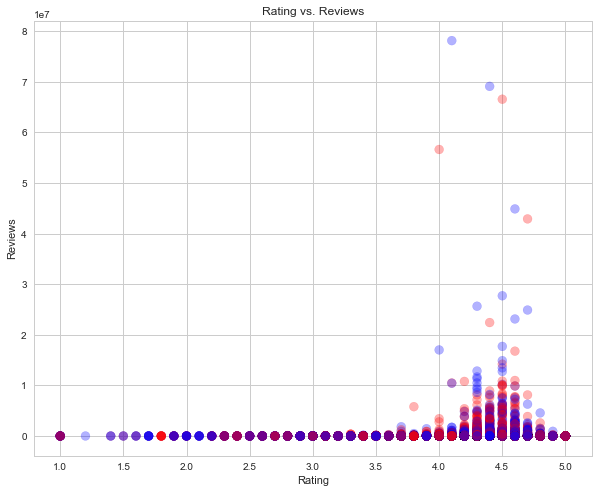

In [230]:
# Rating vs Reviews

print("There is no significant trend and graph does not tell me much")
plt.gcf().set_size_inches(10, 8)
plt.scatter(x=rating, y=reviews, marker='o', color=['b','r'], alpha=0.3, s=80)
plt.title(s="Rating vs. Reviews")
plt.xlabel("Rating")
plt.ylabel("Reviews");

Graph does not tell me much


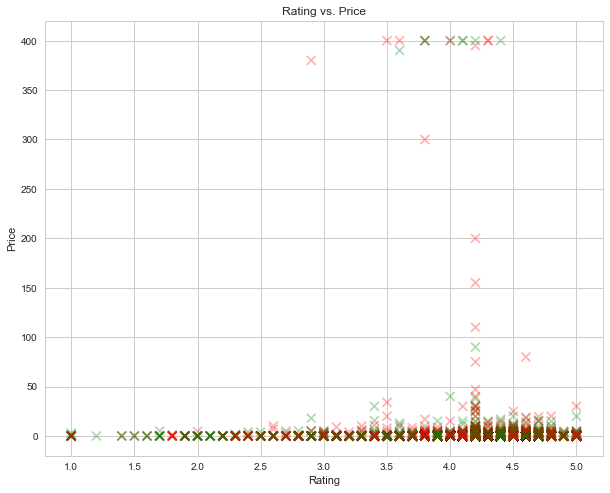

In [231]:
# Rating vs Price

print("Graph does not tell me much")
plt.gcf().set_size_inches(10, 8)
plt.scatter(x=rating, y=price, marker='x', color=['g','r'], alpha=0.3, s=80)
plt.title(s='Rating vs. Price')
plt.xlabel("Rating")
plt.ylabel("Price");

No trend of correlation


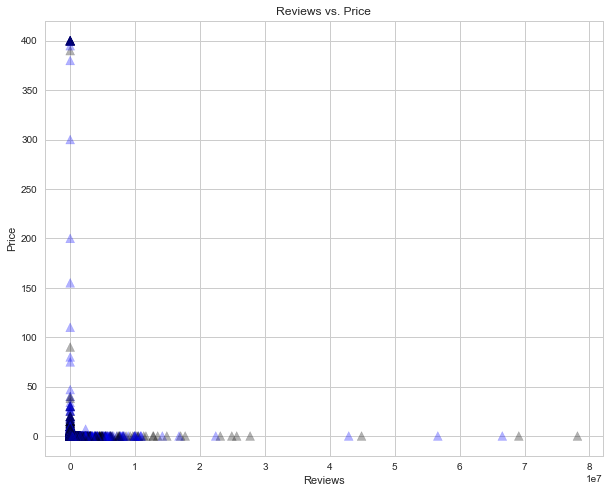

In [232]:
# Reviews vs Price

print("No trend of correlation")
plt.gcf().set_size_inches(10, 8)
plt.scatter(x=reviews, y=price, marker="^", color=['k','b'], alpha=0.3, s=80)
plt.title("Reviews vs. Price")
plt.xlabel("Reviews")
plt.ylabel("Price");

In [233]:
from pandas.plotting import scatter_matrix

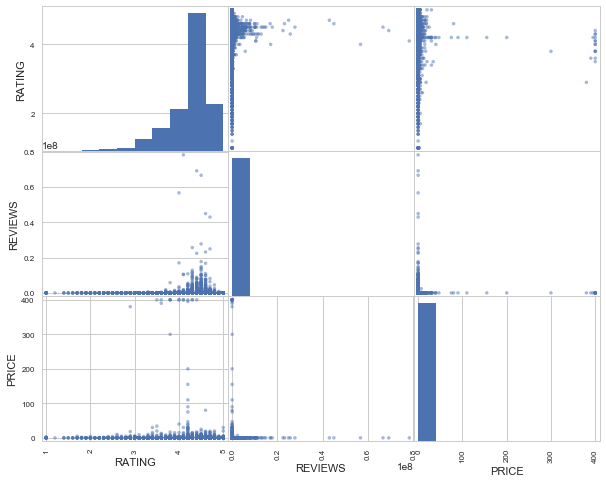

In [234]:
scatter_matrix(numeric_google)
plt.gcf().set_size_inches(10, 8)
plt.show();

### Qualitative variables

 ** What is the most popular categories in Google app store?  nononon**

In [235]:
google.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 0 to 10840
Data columns (total 13 columns):
APP               9660 non-null object
CATEGORY          9660 non-null category
RATING            9660 non-null float64
REVIEWS           9660 non-null int32
SIZE              9660 non-null object
INSTALLS          9660 non-null category
TYPE              9660 non-null category
PRICE             9660 non-null float64
CONTENT_RATING    9660 non-null category
GENRES            9660 non-null category
LAST_UPDATED      9660 non-null datetime64[ns]
CURRENT_VER       9660 non-null object
ANDROID_VER       9660 non-null object
dtypes: category(5), datetime64[ns](1), float64(2), int32(1), object(4)
memory usage: 697.2+ KB


In [236]:
google.head(2)

,APP,CATEGORY,RATING,REVIEWS,SIZE,INSTALLS,TYPE,PRICE,CONTENT_RATING,GENRES,LAST_UPDATED,CURRENT_VER,ANDROID_VER
0,photo editor & candy camera & grid & scrapbook,art_and_design,4.1,159,19m,"10,000+",Free,0.0,everyone,art & design,2018-01-07,1.0.0,4.0.3 and up
1,coloring book moana,art_and_design,3.9,967,14m,"500,000+",Free,0.0,everyone,art & design;pretend play,2018-01-15,2.0.0,4.0.3 and up


** Counts of google apps by category **

Top 4 most common categories are: 
------------------------------
family with 1832 numbers
game with 959 numbers
tools with 827 numbers
business with 420 numbers


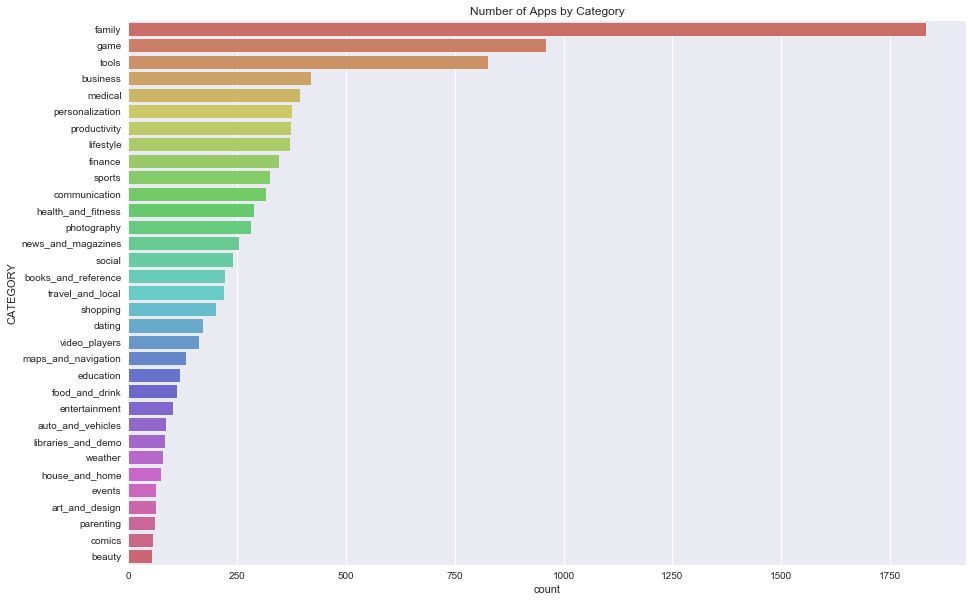

In [237]:
print("Top 4 most common categories are: ")
print("-"*30)
top4_category = google["CATEGORY"].value_counts().nlargest(4).to_dict()
for category, count in top4_category.items():
    print("{category} with {count} numbers".format(category=category, count=count))


sns.set(rc={"figure.figsize": (15, 10)})
sns.countplot(y="CATEGORY", data=google, order=google["CATEGORY"].value_counts().index,palette="hls").set_title("Number of Apps by Category");

** Number of Free and Paid apps **

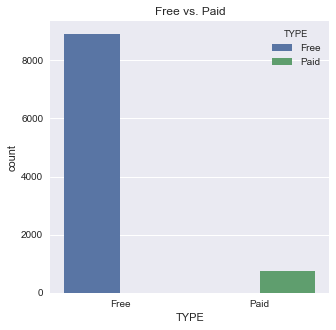

In [238]:
sns.set(rc={"figure.figsize":(5,5)})
sns.countplot(x="TYPE", hue="TYPE",data=google).set_title("Free vs. Paid");

** Number of apps by content rating **

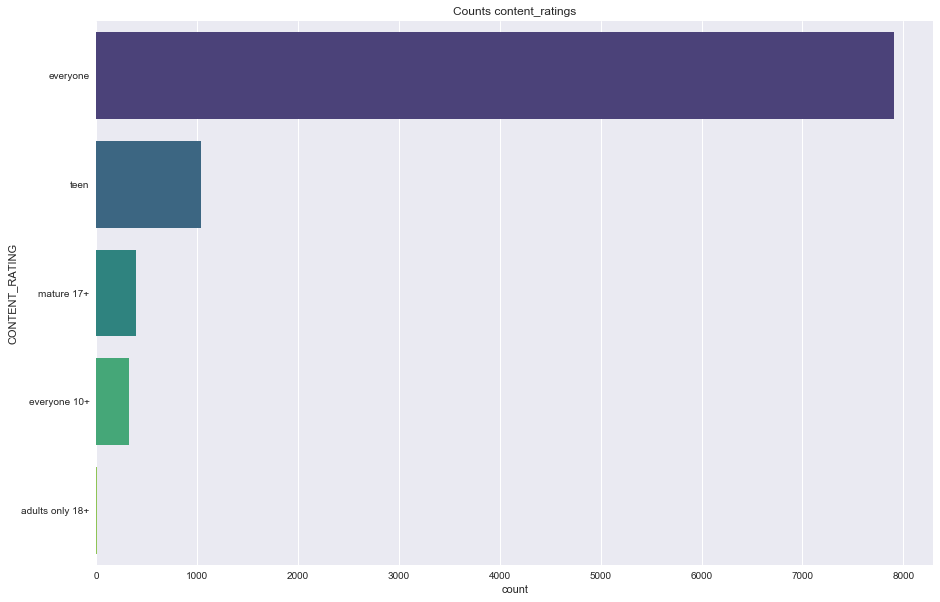

In [239]:
sns.set(rc={"figure.figsize":(15,10)})
sns.countplot(y="CONTENT_RATING", data=google, order=google["CONTENT_RATING"]
              .value_counts().index, palette="viridis").set_title("Counts content_ratings");

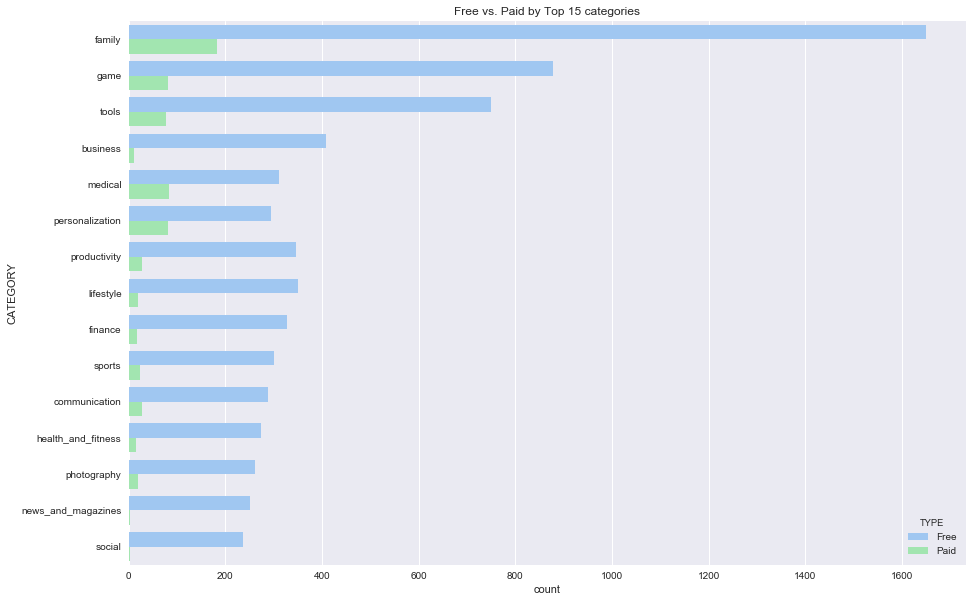

In [240]:
sns.countplot(y="CATEGORY" , hue="TYPE", palette="pastel",data=google
             , order=google["CATEGORY"].value_counts().iloc[:15]
              .index).set_title("Free vs. Paid by Top 15 categories");

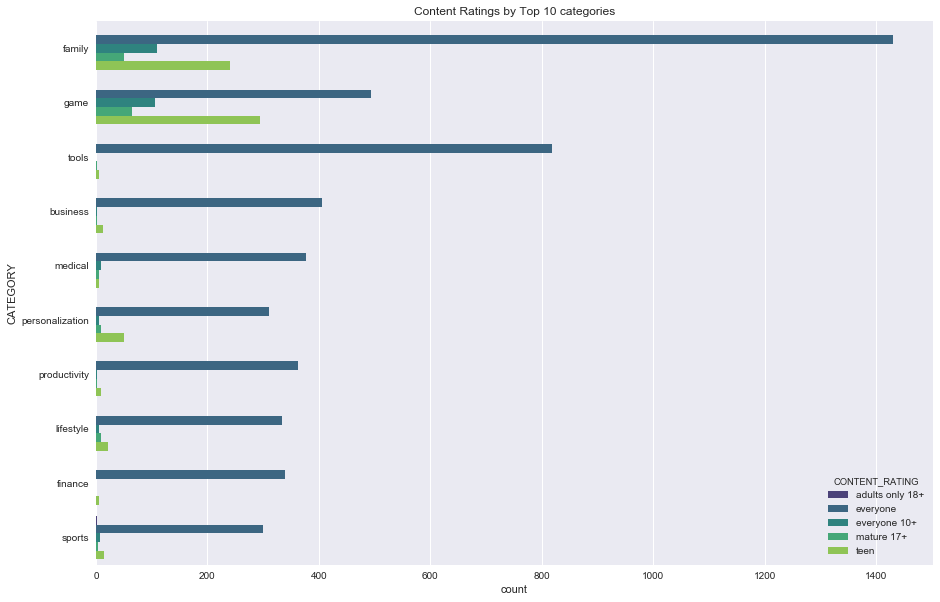

In [241]:
sns.countplot(y="CATEGORY" , hue="CONTENT_RATING", palette="viridis", data=google
             , order=google["CATEGORY"].value_counts().iloc[:10]
              .index).set_title("Content Ratings by Top 10 categories");

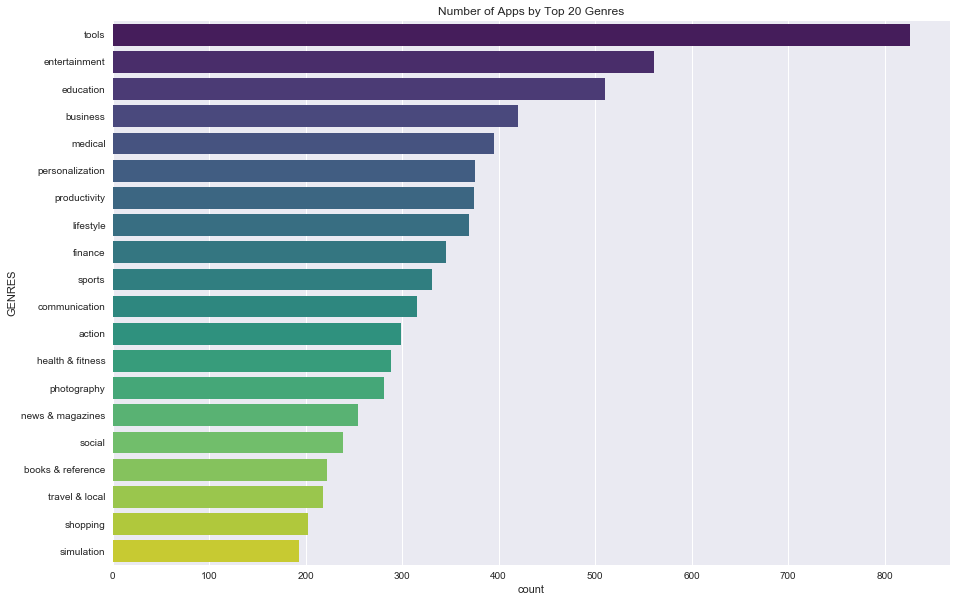

In [262]:
sns.countplot(y="GENRES", data=google, palette="viridis"
              , order=google["GENRES"].value_counts().iloc[:20].index).set_title("Number of Apps by Top 20 Genres");

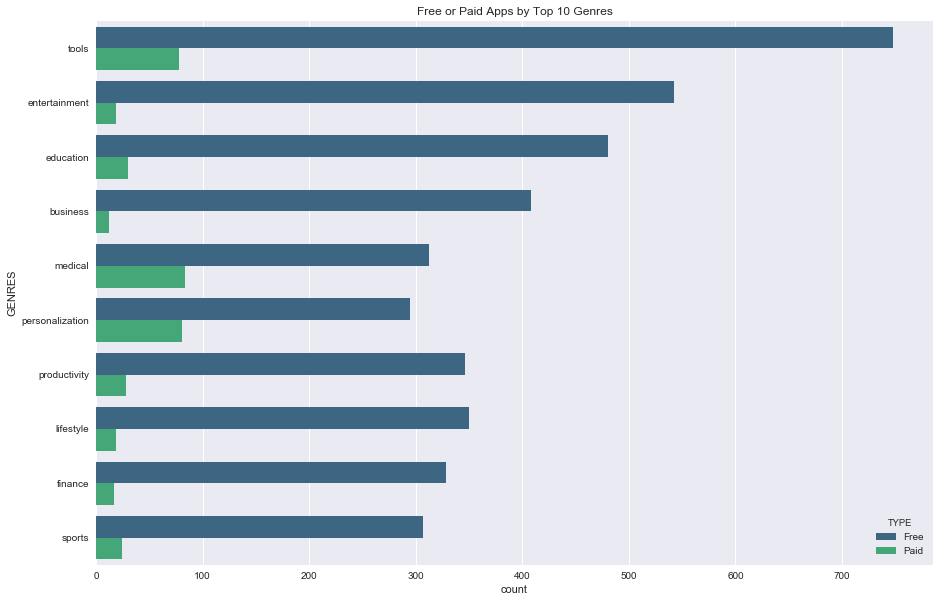

In [265]:
sns.countplot(y="GENRES", hue="TYPE",data=google, palette="viridis"
              , order=google["GENRES"].value_counts().iloc[:10].index).set_title("Free or Paid Apps by Top 10 Genres");

In [284]:
google["RATING"] = google["RATING"].astype("category")

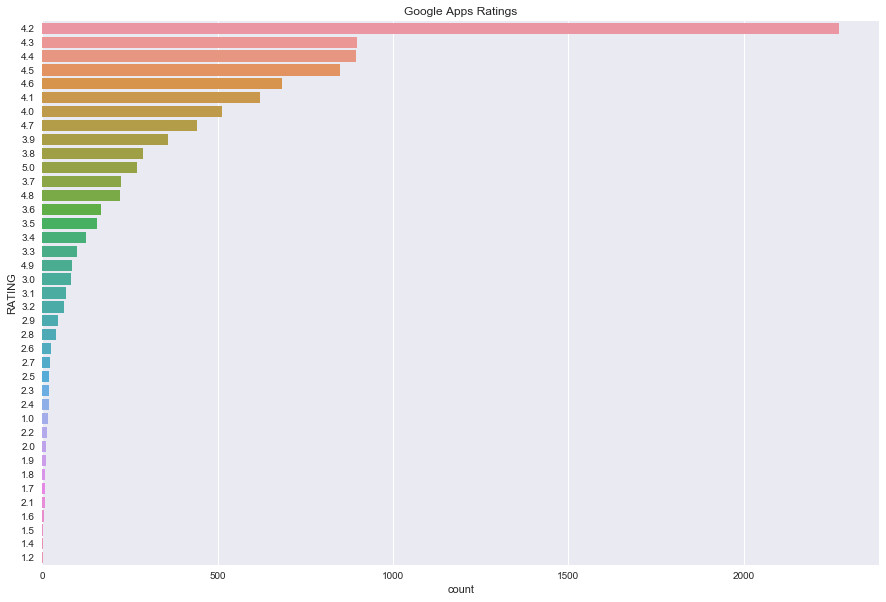

In [289]:
sns.countplot(y="RATING", data=google, order=google["RATING"].value_counts().index).set_title("Google Apps Ratings");

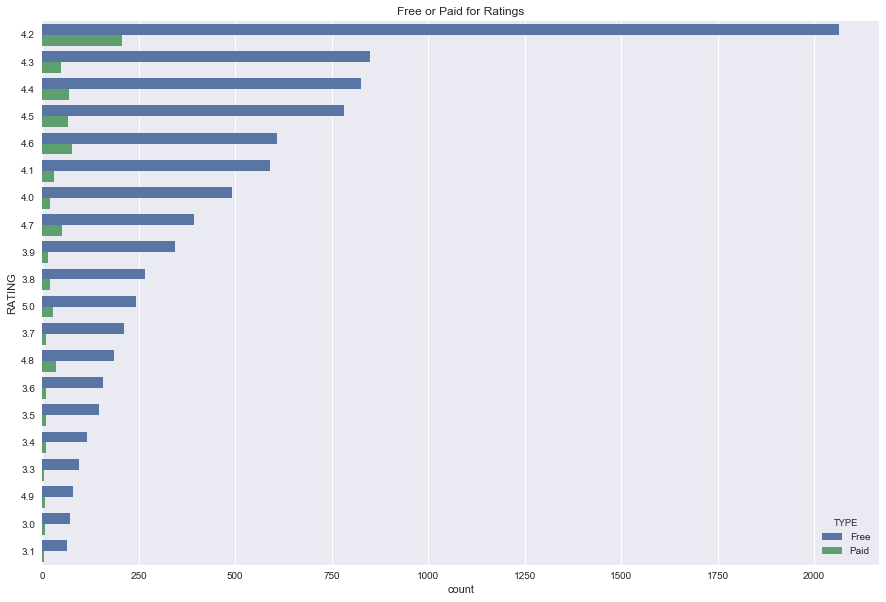

In [292]:
sns.countplot(y="RATING", hue="TYPE",data=google
              , order=google["RATING"].value_counts().iloc[:20].index).set_title("Free or Paid for Ratings");